In [2]:
%pip install sdv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.9/185.9 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 78.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.2/74.2 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.4/198.4 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 65.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 7.1 MB/s eta 0:00:00


In [3]:
from sdv.io.local import CSVHandler

connector = CSVHandler()

In [44]:
FOLDER_NAME = "/content/"

data = connector.read(folder_name=FOLDER_NAME)

In [45]:
data.keys()

dict_keys(['books'])

In [33]:
books_table = data['books']
books_table.head()

,book_id,title,author,is_available
0,1,To Kill a Mockingbird,Harper Lee,1
1,2,1984,George Orwell,1
2,3,The Great Gatsby,F. Scott Fitzgerald,0
3,4,Moby Dick,Herman Melville,1
4,5,Pride and Prejudice,Jane Austen,0


In [10]:
from sdv.metadata import Metadata

metadata = Metadata.detect_from_dataframes(data)

Auto detected data:


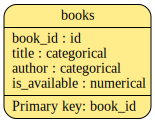

In [46]:
print('Auto detected data:')
metadata.visualize()

In [12]:
metadata.validate()

In [13]:
from sdv.multi_table import HMASynthesizer

synthesizer = HMASynthesizer(metadata)
synthesizer.fit(data)
synthetic_data = synthesizer.sample(scale=1)

/usr/local/lib/python3.12/dist-packages/sdv/multi_table/base.py:108: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(
Preprocess Tables: 100%|██████████| 1/1 [00:00<00:00,  6.49it/s]



Learning relationships:



Modeling Tables: 100%|██████████| 1/1 [00:00<00:00,  2.54it/s]


In [21]:
synthetic_data['books'].head(10)

,book_id,title,author,is_available
0,9383768,One Hundred Years of Solitude,Gabriel Garcia Marquez,0
1,6511194,Fahrenheit 451,J.R.R. Tolkien,1
2,6917236,The Catcher in the Rye,J.R.R. Tolkien,0
3,15035758,The Catcher in the Rye,J.D. Salinger,0
4,6177141,One Hundred Years of Solitude,Gabriel Garcia Marquez,0
5,2825707,The Catcher in the Rye,J.R.R. Tolkien,1
6,13696955,Brave New World,Ray Bradbury,0
7,7749648,The Catcher in the Rye,J.D. Salinger,0
8,3382574,The Alchemist,Paulo Coelho,0
9,9231086,Moby Dick,Jane Austen,0


In [19]:
synthetic_data['books'].shape

(12, 4)